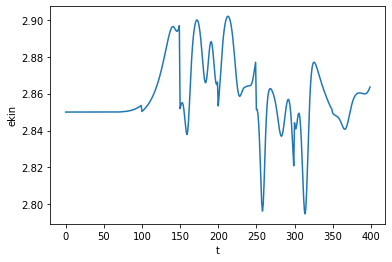

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

steps=[i for i in range(99,2000,100)]

x= np.loadtxt("gas/output_ekin.dat")
#x, y, error= np.loadtxt("gas/ave_ekin.dat", usecols=(0,1,2), delimiter=' ', unpack='true')


#plt.errorbar(x,y, yerr=error)
plt.plot(x)
plt.xlabel('t')
plt.ylabel('ekin')
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

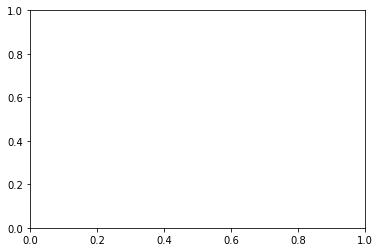

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x= np.loadtxt("output_etot.dat")
y, error= np.loadtxt("ave_etot.dat", usecols=(0,1), delimiter=' ', unpack='true')

plt.errorbar(steps,y, yerr=error)
plt.plot(x)
plt.xlabel('t')
plt.ylabel('etot')

plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

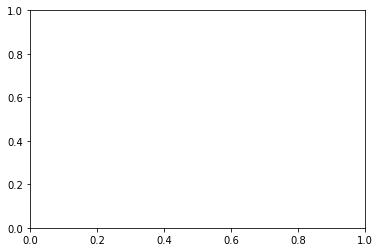

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x= np.loadtxt("output_epot.dat")
y, error= np.loadtxt("ave_epot.dat", usecols=(0,1), delimiter=' ', unpack='true')


plt.errorbar(steps,y, yerr=error)
plt.plot(x)
plt.xlabel('t')
plt.ylabel('epot')

plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

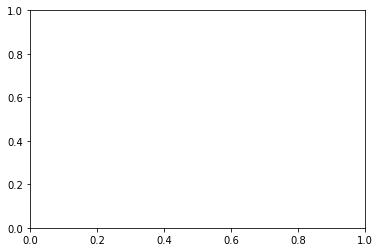

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x= np.loadtxt("output_temp.dat")
y, error= np.loadtxt("ave_temp.dat", usecols=(0,1), delimiter=' ', unpack='true')


plt.errorbar(steps,y, yerr=error)
plt.plot(x)
plt.xlabel('t')
plt.ylabel('temp')

plt.show()

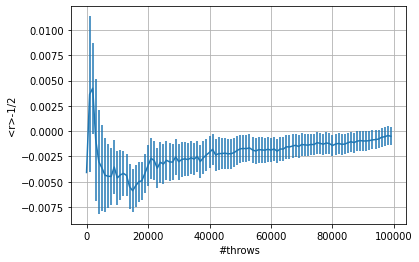

In [13]:
# import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV**2)/n)

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
np.random.seed(0)     # Fixing random seed for reproducibility
r = np.random.rand(M) # U[0,1) uniform distribution
x = np.arange(N)      # [0,1,2,...,N-1]
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += r[k]
    ave = sum/L       # r_i 
    av2 = (ave)**2 # (r_i)^2 
    for j in range(i,N):
        sum_prog[j] += ave/(j+1) # SUM_{j=0,i} r_j
        su2_prog[j] += av2/(j+1) # SUM_{j=0,i} (r_j)^2
    err_prog[i] = error(sum_prog[i],su2_prog[i],i) # Statistical uncertainty
    
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,sum_prog-0.5,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()


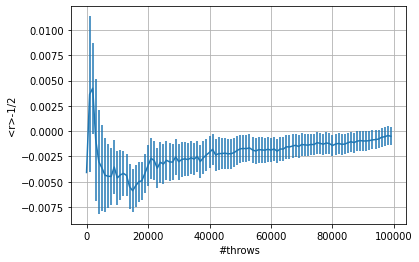

In [6]:
# import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
np.random.seed(0)     # Fixing random seed for reproducibility
r = np.random.rand(M) # U[0,1) uniform distribution
x = np.arange(N)      # [0,1,2,...,N-1]
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += r[k]
    ave[i] = sum/L       # r_i 
    av2[i] = (ave[i])**2 # (r_i)^2 

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
        su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,sum_prog-0.5,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()